**Graph Creation and calculating all the metrics**



In [9]:
with open('/content/p2p-Gnutella04.txt', 'r') as f:
    nodes = set()
    in_degrees = {}
    out_degrees = {}
    num_edges = 0
    edges = []
    for line in f:
        node1, node2 = map(int, line.strip().split())
        nodes.add(node1)
        nodes.add(node2)
        in_degrees[node2] = in_degrees.get(node2, 0) + 1
        out_degrees[node1] = out_degrees.get(node1, 0) + 1
        edges.append((node1, node2))
        num_edges += 1
    num_nodes = len(nodes)
    avg_in_degree = sum(in_degrees.values()) / len(in_degrees)
    avg_out_degree = sum(out_degrees.values()) / len(out_degrees)
    max_in_degree_node = max(in_degrees, key=in_degrees.get)
    max_out_degree_node = max(out_degrees, key=out_degrees.get)
    density = num_edges / (num_nodes * (num_nodes - 1))

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Avg In-degree: {avg_in_degree}")
print(f"Avg Out-degree: {avg_out_degree}")
print(f"Node with Max In-degree: {max_in_degree_node}")
print(f"Node with Max Out-degree: {max_out_degree_node}")
print(f"Density of the network: {density}")

Number of Nodes: 10876
Number of Edges: 39994
Avg In-degree: 3.684045689019897
Avg Out-degree: 8.104154002026343
Node with Max In-degree: 1054
Node with Max Out-degree: 3109
Density of the network: 0.0003381398671756435


**Creating adjacency matrix**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to map node IDs to matrix indices
node_dict = {}
for i, node in enumerate(sorted(nodes)):
    node_dict[node] = i

# Initialize the adjacency matrix with zeros
adj_matrix = np.zeros((num_nodes, num_nodes))

# Populate the adjacency matrix
for edge in edges:
    i, j = edge
    adj_matrix[node_dict[i], node_dict[j]] = 1
    adj_matrix[node_dict[j], node_dict[i]] = 1

# Convert NumPy array to pandas DataFrame
df = pd.DataFrame(adj_matrix, columns=sorted(nodes), index=sorted(nodes)).astype(int)
df

,0,1,2,3,4,5,6,7,8,9,...,10869,10870,10871,10872,10873,10874,10875,10876,10877,10878
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
10875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Creating Adjacency List**

In [3]:
with open('/content/p2p-Gnutella04.txt', 'r') as f:
    adj_list = {}
    for line in f:
        node1, node2 = map(int, line.strip().split())
        if node1 not in adj_list:
            adj_list[node1] = [node2]
        else:
            adj_list[node1].append(node2)
            
        if node2 not in adj_list:
            adj_list[node2] = [node1]
        else:
            adj_list[node2].append(node1)

In [4]:
for key, value in adj_list.items():
    print(key, ":", value)

Streaming output truncated to the last 5000 lines.
5508 : [3191]
5514 : [3193, 5003]
5515 : [3193, 560, 589, 3561, 3859, 4929, 4958, 5649, 6849, 6991, 7233, 5894]
5516 : [3193, 4385, 164, 412, 648, 904, 2181, 3297, 5808, 7234, 7235]
5519 : [3196, 819, 885, 1111, 1616, 2230, 2873, 2875, 3439, 3546, 3865, 4307, 6405, 6464, 6600, 7280, 7315, 7316, 7317]
5517 : [3197, 4097, 81, 107, 2169, 2870, 3065, 3901, 4295, 6148, 7236, 7237, 6567]
5518 : [3197, 3264, 3714, 10264]
7758 : [3199]
7759 : [3199]
7760 : [3199]
7761 : [3199]
7762 : [3199]
7763 : [3199]
7764 : [3199]
7765 : [3199]
7766 : [3199]
5529 : [3202, 4420, 7888, 9922]
5530 : [3202, 3838, 8246, 9633]
5520 : [3204, 3256, 3822, 5406, 537, 824, 2976, 2977, 3441, 4042, 4505, 4782, 5008, 6904, 7775]
5521 : [3204, 3229, 3365, 5064, 6428, 7255]
5523 : [3204, 7101]
6116 : [3207, 3905, 5617]
6401 : [3207, 4237, 5867, 7475, 7915, 8707, 10613, 10757]
6665 : [3207, 4560]
6862 : [3207, 4855]
7490 : [3207, 7900, 8989, 9586]
5524 : [3208, 3556, 3900,

**CReating Edge List representation:**

In [ ]:
for edge in edges:
    print(f"{edge[0]} ---> {edge[1]}")

Streaming output truncated to the last 5000 lines.
9503 ---> 8361
9503 ---> 8810
9503 ---> 9788
9503 ---> 9789
9510 ---> 1855
9510 ---> 2152
9510 ---> 9297
9510 ---> 9807
9510 ---> 9808
9510 ---> 9809
9511 ---> 3949
9511 ---> 5302
9511 ---> 5861
9511 ---> 5961
9511 ---> 6367
9511 ---> 7612
9511 ---> 8157
9511 ---> 9614
9511 ---> 9774
9511 ---> 9787
9514 ---> 9806
9519 ---> 263
9519 ---> 699
9519 ---> 895
9519 ---> 984
9519 ---> 3075
9519 ---> 8559
9519 ---> 9024
9519 ---> 9791
9519 ---> 9792
9519 ---> 9793
9520 ---> 1280
9520 ---> 1451
9520 ---> 2444
9520 ---> 6324
9520 ---> 8076
9520 ---> 8713
9520 ---> 9198
9520 ---> 9479
9520 ---> 9794
9520 ---> 9795
9521 ---> 149
9521 ---> 626
9521 ---> 1471
9521 ---> 1474
9521 ---> 1476
9521 ---> 1574
9521 ---> 2785
9521 ---> 8423
9521 ---> 9796
9521 ---> 9797
9524 ---> 5026
9525 ---> 1515
9525 ---> 1904
9525 ---> 2144
9525 ---> 5267
9525 ---> 5940
9525 ---> 6679
9525 ---> 7807
9525 ---> 7821
9525 ---> 8748
9525 ---> 9615
9528 ---> 58
9528 ---> 81

**Creating Graph for indegree distribution**

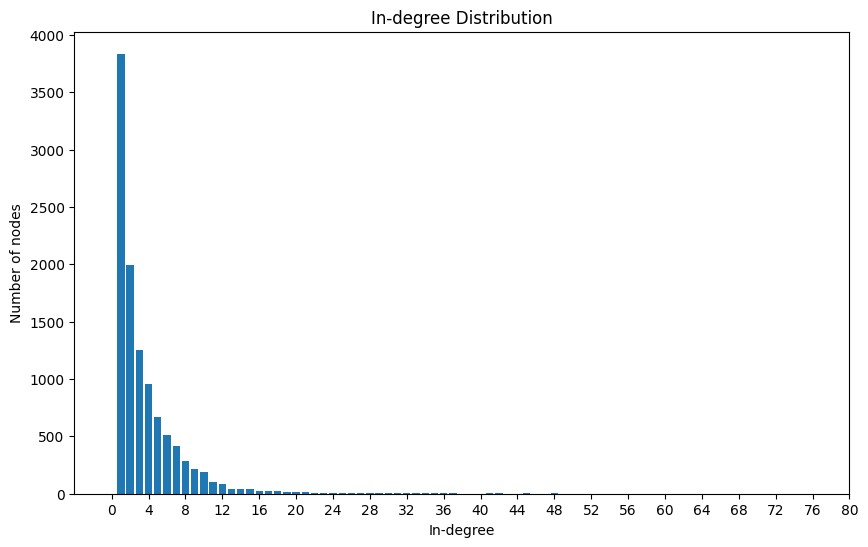

In [ ]:
import matplotlib.pyplot as plt

# Create a list of in-degree counts
in_degree_counts = [in_degrees[node] for node in in_degrees]

# Calculate the number of nodes for each degree
degree_counts = [0] * (max(in_degree_counts) + 1)
for count in in_degree_counts:
    degree_counts[count] += 1

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the degree distribution
ax.bar(range(len(degree_counts)), degree_counts, align='center')

# Set the x-tick locations and labels
x_max = len(degree_counts) - 1
x_step = round(x_max / 20)
x_ticks = [i * x_step for i in range(21)]
x_ticklabels = [str(i * x_step) for i in range(21)]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# Set the y-axis label and title
ax.set_xlabel('In-degree')
ax.set_ylabel('Number of nodes')
ax.set_title('In-degree Distribution')

# Set the figure size and display the plot
fig.set_size_inches(10, 6)
plt.show()

**Creating Graph for Indegree and outdegree distribution**

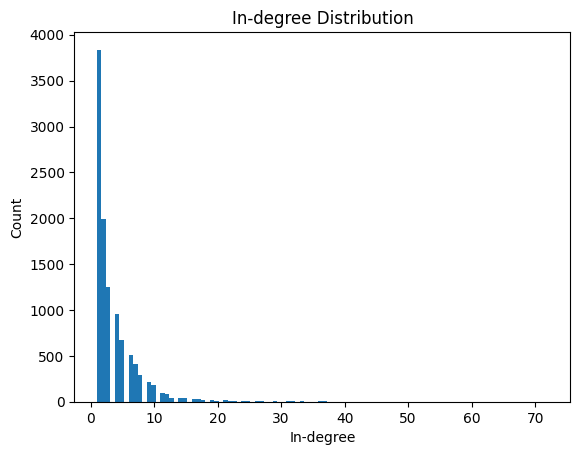

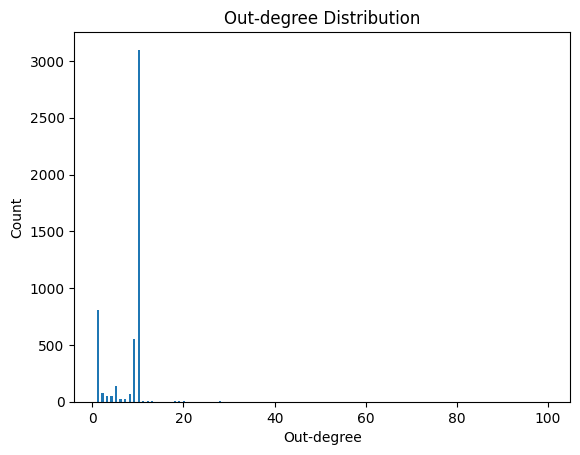

In [ ]:
import matplotlib.pyplot as plt
# Plot in-degree distribution
in_degree_counts = list(in_degrees.values())
max_in_degree = max(in_degrees.values())
in_degree_bins = range(0, max_in_degree + 2)
plt.hist(in_degree_counts, bins=100)
plt.title("In-degree Distribution")
plt.xlabel("In-degree")
plt.ylabel("Count")
plt.show()

# Plot out-degree distribution
out_degree_counts = list(out_degrees.values())
max_out_degree = max(out_degrees.values())
out_degree_bins = range(0, max_out_degree + 2)
plt.hist(out_degree_counts, bins=200)
plt.title("Out-degree Distribution")
plt.xlabel("Out-degree")
plt.ylabel("Count")
plt.show()

**Plotting scatter plot to show the distribution**

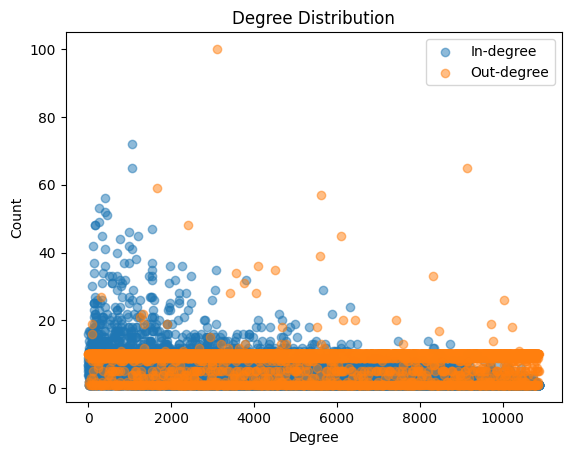

In [ ]:
# Create arrays of in-degree and out-degree counts
in_degree_counts = list(in_degrees.values())
out_degree_counts = list(out_degrees.values())

# Create arrays of degree values
in_degrees = list(in_degrees.keys())
out_degrees = list(out_degrees.keys())

# Plot in-degree and out-degree counts as a scatter plot
plt.scatter(in_degrees, in_degree_counts, label='In-degree', alpha=0.5)
plt.scatter(out_degrees, out_degree_counts, label='Out-degree', alpha=0.5)

plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.legend()
plt.show()

**Creating clustering coefficients for every node**

In [11]:
import matplotlib.pyplot as plt
with open('/content/p2p-Gnutella04.txt', 'r') as f:
    adj_list = {}
    nodes = set()
    for line in f:
        node1, node2 = map(int, line.strip().split())
        nodes.add(node1)
        nodes.add(node2)
        if node1 in adj_list:
            adj_list[node1].add(node2)
        else:
            adj_list[node1] = set([node2])
        if node2 in adj_list:
            adj_list[node2].add(node1)
        else:
            adj_list[node2] = set([node1])
    num_nodes = len(nodes)

# Calculate local clustering coefficient for each node
clustering_coeffs = {}
for node in adj_list:
    neighbors = adj_list[node]
    k = len(neighbors)
    if k > 1:
        possible_triangles = k * (k - 1) / 2
        actual_triangles = 0
        for i in neighbors:
            for j in neighbors:
                if i < j and j in adj_list[i]:
                    actual_triangles += 1
        clustering_coeffs[node] = actual_triangles / possible_triangles
    else:
        clustering_coeffs[node] = 0
    # Print clustering coefficient for the node
    print(f"Node {node}: Clustering Coefficient = {clustering_coeffs[node]}")



Streaming output truncated to the last 5000 lines.
Node 5508: Clustering Coefficient = 0
Node 5514: Clustering Coefficient = 0.0
Node 5515: Clustering Coefficient = 0.0
Node 5516: Clustering Coefficient = 0.01818181818181818
Node 5519: Clustering Coefficient = 0.0
Node 5517: Clustering Coefficient = 0.0
Node 5518: Clustering Coefficient = 0.0
Node 7758: Clustering Coefficient = 0
Node 7759: Clustering Coefficient = 0
Node 7760: Clustering Coefficient = 0
Node 7761: Clustering Coefficient = 0
Node 7762: Clustering Coefficient = 0
Node 7763: Clustering Coefficient = 0
Node 7764: Clustering Coefficient = 0
Node 7765: Clustering Coefficient = 0
Node 7766: Clustering Coefficient = 0
Node 5529: Clustering Coefficient = 0.0
Node 5530: Clustering Coefficient = 0.0
Node 5520: Clustering Coefficient = 0.0
Node 5521: Clustering Coefficient = 0.0
Node 5523: Clustering Coefficient = 0.0
Node 6116: Clustering Coefficient = 0.0
Node 6401: Clustering Coefficient = 0.0
Node 6665: Clustering Coefficient

**Plotting clustering coefficients distribution graph:**

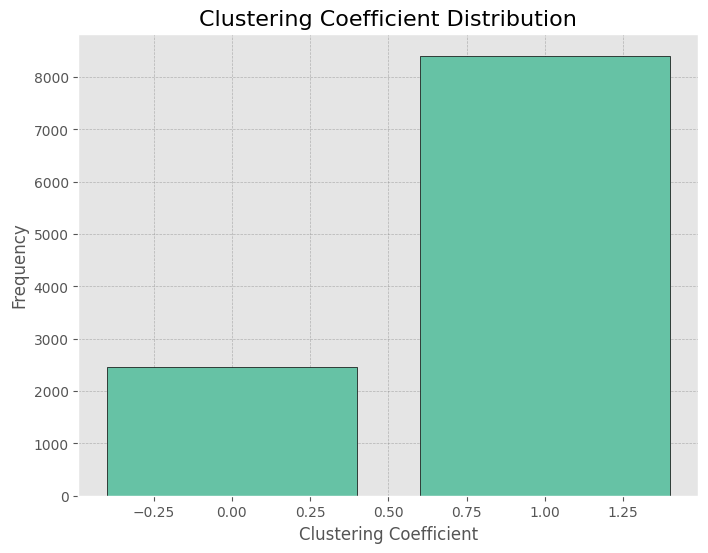

In [12]:
# Read the graph from the file
with open('/content/p2p-Gnutella04.txt', 'r') as f:
    adj_list = {}
    nodes = set()
    for line in f:
        node1, node2 = map(int, line.strip().split())
        nodes.add(node1)
        nodes.add(node2)
        if node1 in adj_list:
            adj_list[node1].add(node2)
        else:
            adj_list[node1] = set([node2])
        if node2 in adj_list:
            adj_list[node2].add(node1)
        else:
            adj_list[node2] = set([node1])
    num_nodes = len(nodes)

# Calculate local clustering coefficient for each node
clustering_coeffs = {}
for node in adj_list:
    in_neighbors = set()
    out_neighbors = set()
    if node in adj_list:
        in_neighbors = adj_list[node]
    for neighbor in adj_list:
        if node in adj_list[neighbor]:
            out_neighbors.add(neighbor)
    k_in = len(in_neighbors)
    k_out = len(out_neighbors)
    if k_in > 1:
        possible_triangles_in = k_in * (k_in - 1) / 2
        actual_triangles_in = 0
        for i in in_neighbors:
            for j in in_neighbors:
                if i < j and node in adj_list[i] and node in adj_list[j]:
                    actual_triangles_in += 1
        clustering_coeffs[node] = actual_triangles_in / possible_triangles_in
    else:
        clustering_coeffs[node] = 0
    if k_out > 1:
        possible_triangles_out = k_out * (k_out - 1) / 2
        actual_triangles_out = 0
        for i in out_neighbors:
            for j in out_neighbors:
                if i < j and node in adj_list[i] and node in adj_list[j]:
                    actual_triangles_out += 1
        clustering_coeffs[node] += actual_triangles_out / possible_triangles_out
    else:
        clustering_coeffs[node] += 0
    clustering_coeffs[node] /= 2

# Plot clustering coefficient distribution
clustering_coeff_counts = {}
for coeff in clustering_coeffs.values():
    clustering_coeff_counts[coeff] = clustering_coeff_counts.get(coeff, 0) + 1
x = sorted(clustering_coeff_counts.keys())
y = [clustering_coeff_counts[key] for key in x]

# Set plot style
plt.style.use('ggplot')

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# Add data to the axes object
ax.bar(x, y, color='#66c2a5', edgecolor='black')

# Add x and y labels
ax.set_xlabel("Clustering Coefficient", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

# Add plot title
ax.set_title("Clustering Coefficient Distribution", fontsize=16)

# Add grid lines
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Change tick font size
ax.tick_params(axis='both', labelsize=10)

# Show the plot
plt.show()